In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_poly = pd.read_csv(r'C:\Users\Owner\Downloads\Machine Learning\Regression\HeightvsWeight.csv')

In [49]:
df_poly.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [50]:
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
Age       71 non-null int64
Height    71 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


In [51]:
np.sum(df_poly.isnull())

Age       0
Height    0
dtype: int64

In [52]:
df_poly.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


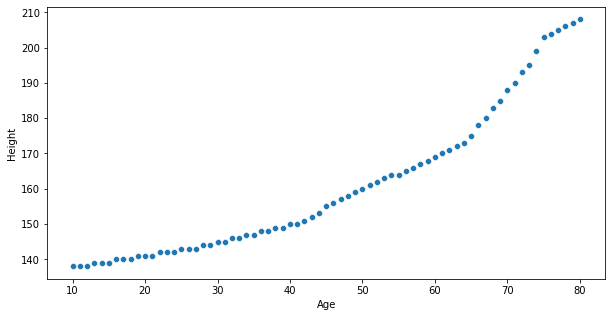

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_poly['Age'],y=df_poly['Height'])
plt.show()

In [164]:
X = df_poly.loc[:,['Age']]
y = df_poly.loc[:,['Height']]

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state= 42)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin_pred = lin_reg.predict(X_test)

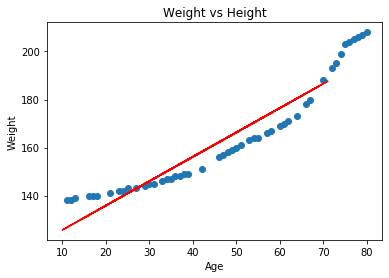

In [171]:
plt.scatter(X_train, y_train)
plt.plot(X_test, lin_reg.predict(X_test), color = 'red')
plt.title('Weight vs Height')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [181]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lin_pred)

0.8445819943197981

In [173]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train)
y_poly_pred = poly_reg.predict(poly.fit_transform(X_test))

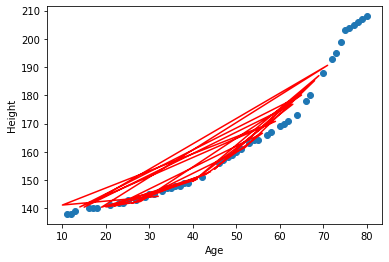

In [178]:
plt.scatter(X_train, y_train)
plt.plot(X_test, poly_reg.predict(poly.fit_transform(X_test)), color = 'red')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

In [180]:
r2_score(y_test, y_poly_pred)

0.9833978872226332